<a href="https://colab.research.google.com/github/FGalvao77/Brain-Tumor-Detection-Using-Deep-Learning-Techniques/blob/main/Brain_Tumor_Detection_Using_Deep_Learning_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

## **Brain Tumor Detection Using Deep Learning Techniques**
---
---

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import time
from google.colab import files

In [3]:
uploaded = files.upload()
time.sleep(10)

Saving kaggle.json to kaggle.json


In [6]:
# %%capture
!pip install --q kaggle -U

In [7]:
!mkdir -p ~/.kaggle && cp kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection --force

 86% 13.0M/15.1M [00:02<00:00, 11.4MB/s]
100% 15.1M/15.1M [00:02<00:00, 7.27MB/s]


In [8]:
%%capture
!unzip /content/brain-mri-images-for-brain-tumor-detection.zip

In [9]:
%rm -rf brain-mri-images-for-brain-tumor-detection.zip no yes

In [10]:
import os

In [11]:
ROOT_dir = r'/content/brain_tumor_dataset'

number_of_images = {}

for dir in os.listdir(ROOT_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_dir, dir)))

print(f'Total number of images: {number_of_images["no"] + number_of_images["yes"]}')
print('=========================================')
print(f'\nNumber of images in respective classes \nno: {number_of_images["no"]} | yes: {number_of_images["yes"]}')

Total number of images: 253

Number of images in respective classes 
no: 98 | yes: 155


In [12]:
# import math, shutil
# from numpy import random

In [13]:
# def data_folder(path, split):
    
#     if not os.path.exists('./' + path):
#         os.mkdir('./' + path)

#         for dir in os.listdir(ROOT_dir):
#             os.makedirs('./' + path + '/' + dir)

#             for img in random.choice(a=os.listdir(os.path.join(ROOT_dir, dir)), 
#                                     #  size = (math.trunc(split * number_of_images[dir]) -5),
#                                     #  size = (math.floor(split * number_of_images[dir]) -5),
#                                      size=(math.ceil(split * number_of_images[dir]) -5), 
#                                      replace=False):
                
#                 x_ = os.path.join(ROOT_dir, dir, img)
#                 y_ = os.path.join('./' + path, dir)

#                 shutil.copy(x_, y_)
#                 os.remove(x_)

#     else:
#         print('The folder already exists!')

In [14]:
# data_folder('data', 1.0)

In [15]:
# ROOT_dir = r'/content/data'

# number_of_images = {}

# for dir in os.listdir(ROOT_dir):
#     number_of_images[dir] = len(os.listdir(os.path.join(ROOT_dir, dir)))

# print(f'Total number of images: {number_of_images["no"] + number_of_images["yes"]}')
# print('=========================================')
# print(f'\nNumber of images in respective classes \nno: {number_of_images["no"]} | yes: {number_of_images["yes"]}')

In [16]:
import cv2
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

In [17]:
X, y = [], []

# os.chdir(r'/content/brain_tumor_dataset/yes')
os.chdir(f'{ROOT_dir}/yes')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))

    X.append(img)
    y.append((i[0:1]))


# os.chdir(r'/content/brain_tumor_dataset/no')
os.chdir(f'{ROOT_dir}/no')
for i in tqdm(os.listdir()):
    img = cv2.imread(i)
    img = cv2.resize(img, (224, 224))

    X.append(img)
    

for i in range(1, 99):
    y.append('N')

  0%|          | 0/155 [00:00<?, ?it/s]

  0%|          | 0/98 [00:00<?, ?it/s]

In [18]:
len(X), len(y)

(253, 253)

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

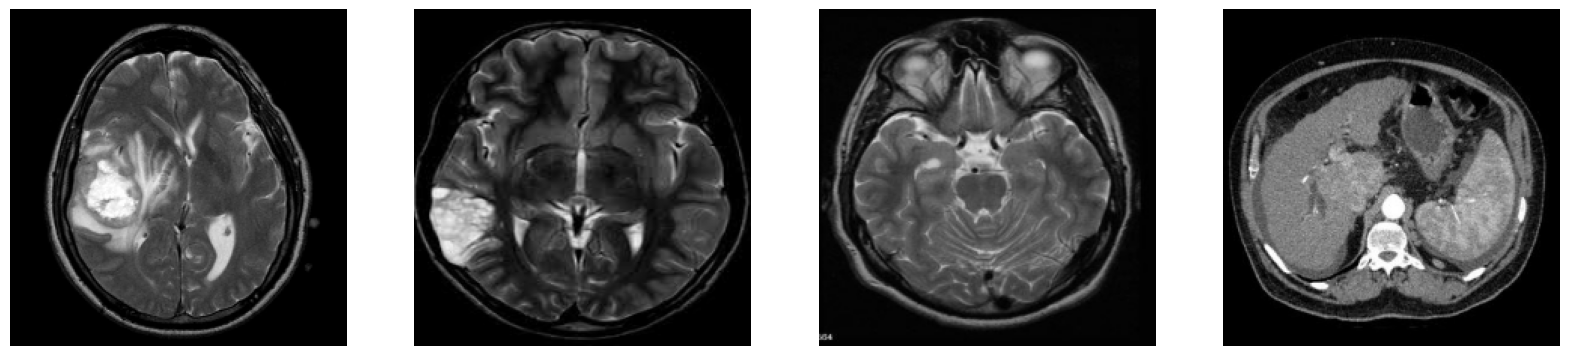

In [20]:
plt.figure(figsize=(20, 20))

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(X[i], cmap='gray')
    plt.axis('off')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split as tts 

In [22]:
X_train, X_val, y_train, y_val = tts(
    X, y, test_size=0.5, random_state=42
)

print(f'Shape of an image in \nX_train: {X_train[0].shape} | X_test: {X_val[0].shape}')

Shape of an image in 
X_train: (224, 224, 3) | X_test: (224, 224, 3)


In [23]:
len(X_train), len(X_val), len(y_train), len(y_val)

(126, 127, 126, 127)

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)

In [26]:
import tensorflow as tf

In [27]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)

In [28]:
import numpy as np

In [29]:
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [30]:
print(
    'Shape:\n'
    '=============================================================================================\n'
    f'X_train: {X_train.shape} | X_val: {X_val.shape} | y_train: {y_train.shape} | y_val: {y_val.shape}'

)

Shape:
X_train: (126, 224, 224, 3) | X_val: (127, 224, 224, 3) | y_train: (126, 2) | y_val: (127, 2)


In [31]:
from keras.applications import vgg16

In [32]:
img_rows, img_cols = 224, 224

model_vgg16 = vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(img_rows, img_cols, 3)
)

58889256/58889256 [==============================] - 4s 0us/step


In [33]:
for layer in model_vgg16.layers:
    layer.trainable=False

In [34]:
for (i, layer) in enumerate(model_vgg16.layers):
    print(str(i) + '' + layer.__class__.__name__, layer.trainable)

0InputLayer False
1Conv2D False
2Conv2D False
3MaxPooling2D False
4Conv2D False
5Conv2D False
6MaxPooling2D False
7Conv2D False
8Conv2D False
9Conv2D False
10MaxPooling2D False
11Conv2D False
12Conv2D False
13Conv2D False
14MaxPooling2D False
15Conv2D False
16Conv2D False
17Conv2D False
18MaxPooling2D False


In [35]:
from keras.layers import Dense, GlobalAveragePooling2D

In [36]:
def setup_model(basemodel, num_classes):

    inp = basemodel.output

    x = GlobalAveragePooling2D()(inp)

    x = Dense(units=1024, activation='relu')(x)
    x = Dense(units=1024, activation='relu')(x)
    x = Dense(units=512, activation='relu')(x)

    out = Dense(units=num_classes, activation='softmax')(x)

    return out

In [37]:
from keras.models import Model

In [38]:
num_classes = 2

create_model = setup_model(model_vgg16, num_classes)

final_model = Model(inputs=model_vgg16.input, outputs=create_model)

In [39]:
final_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
import keras

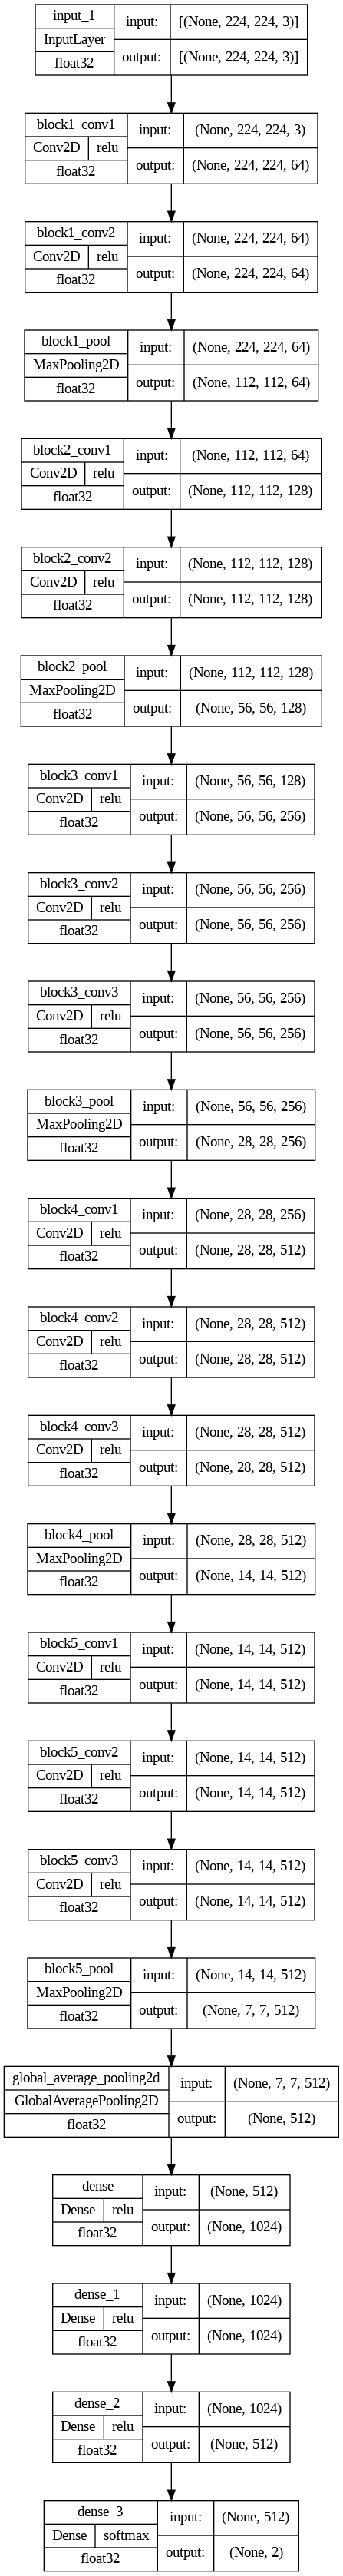

In [41]:
keras.utils.plot_model(
    model=final_model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

In [42]:
final_model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [43]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [44]:
es = EarlyStopping(
    monitor='val_accuracy', 
    # min_delta=0.01,
    patience=5, 
    verbose=1, 
    mode='max'
)

cp = ModelCheckpoint(
    monitor='val_accuracy',
    filepath='/content/bestmodel.h5',
    verbose=1, 
    save_best_only=True,
    mode='max'
)

In [45]:
params = [es, cp]

In [46]:
num_epochs = 20

history = final_model.fit(
    x=X_train, y=y_train, 
    epochs=num_epochs, 
    validation_data=(X_val, y_val), 
    verbose=1, 
    initial_epoch=0,
    shuffle=True, 
    callbacks=[params]
)

Epoch 1/20
4/4 [==============================] - ETA: 0s - loss: 5.9847 - accuracy: 0.5714
Epoch 1: val_accuracy improved from -inf to 0.74016, saving model to /content/bestmodel.h5
4/4 [==============================] - 23s 3s/step - loss: 5.9847 - accuracy: 0.5714 - val_loss: 0.5788 - val_accuracy: 0.7402
Epoch 2/20
4/4 [==============================] - ETA: 0s - loss: 0.6929 - accuracy: 0.6905
Epoch 2: val_accuracy did not improve from 0.74016
4/4 [==============================] - 1s 278ms/step - loss: 0.6929 - accuracy: 0.6905 - val_loss: 1.1917 - val_accuracy: 0.4567
Epoch 3/20
4/4 [==============================] - ETA: 0s - loss: 0.5303 - accuracy: 0.7460
Epoch 3: val_accuracy improved from 0.74016 to 0.76378, saving model to /content/bestmodel.h5
4/4 [==============================] - 1s 343ms/step - loss: 0.5303 - accuracy: 0.7460 - val_loss: 0.5352 - val_accuracy: 0.7638
Epoch 4/20
4/4 [==============================] - ETA: 0s - loss: 0.3496 - accuracy: 0.8413
Epoch 4: va

In [47]:
loss, accuracy = final_model.evaluate(X_train, y_train)

print('\nTrain data')
print(f'Loss:     {(round(loss, 4))}')
print(f'Accuracy: {(round(accuracy, 4))}')

4/4 [==============================] - 1s 115ms/step - loss: 0.0016 - accuracy: 1.0000

Train data
Loss:     0.0016
Accuracy: 1.0


In [48]:
loss, accuracy = final_model.evaluate(X_val, y_val)

print('\nValidation data')
print(f'Loss:     {(round(loss, 4))}')
print(f'Accuracy: {(round(accuracy, 4))}')

4/4 [==============================] - 1s 126ms/step - loss: 0.4842 - accuracy: 0.8976

Validation data
Loss:     0.4842
Accuracy: 0.8976


In [49]:
def vis_model(history):

    plt.style.use('ggplot')

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs_range = range(1, len(history.epoch) + 1)

    plt.figure(figsize=(15,5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training set')
    plt.plot(epochs_range, val_acc, label='Validation set')
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy: Training & Validation')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training set')
    plt.plot(epochs_range, val_loss, label='Validation set')
    plt.legend(loc='best')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss: Training & Validation')

    plt.tight_layout()
    plt.show()

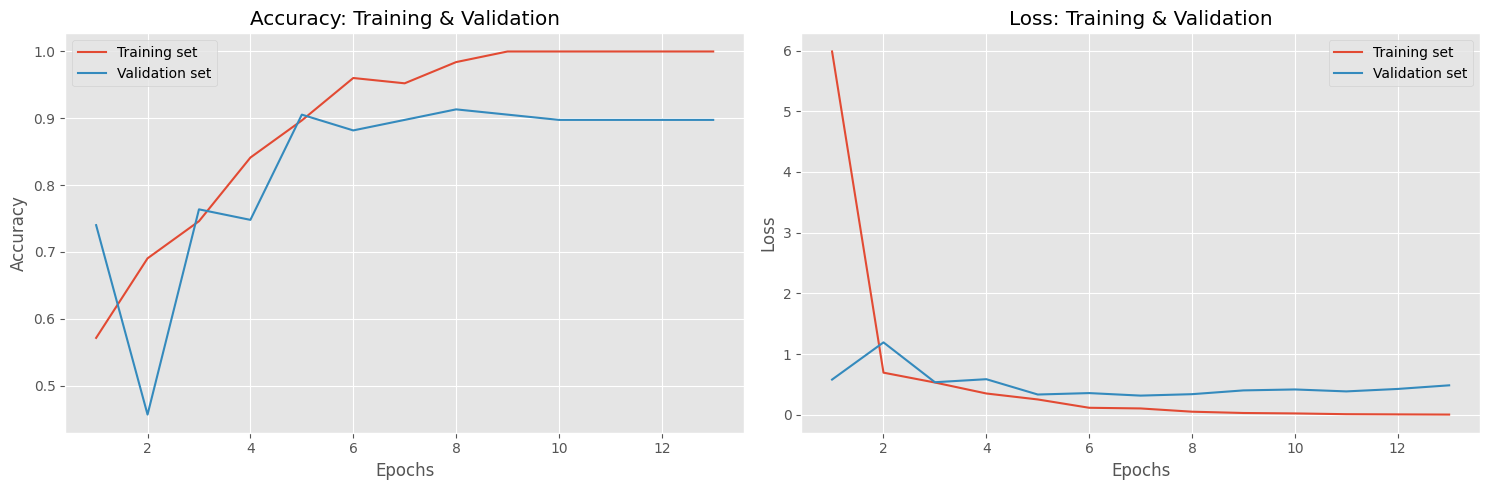

In [50]:
vis_model(history=history)

In [51]:
from keras.models import load_model

In [52]:
model = load_model('/content/bestmodel.h5')

acc_model = model.evaluate(X_val, y_val)[1]
print(f'Accuracy: {acc_model}')

4/4 [==============================] - 1s 129ms/step - loss: 0.3383 - accuracy: 0.9134
Accuracy: 0.913385808467865


In [53]:
!pip install --q -U watermark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.2 MB/s eta 0:00:00


In [54]:
%reload_ext watermark

%watermark -a 'Brain Tumor Detection Using Deep Learning Techniques | Fernando Galvão - Data Scientist' --iversions

Author: Brain Tumor Detection Using Deep Learning Techniques | Fernando Galvão - Data Scientist

google    : 2.0.3
matplotlib: 3.7.1
tensorflow: 2.12.0
keras     : 2.12.0
numpy     : 1.22.4
cv2       : 4.7.0



In [55]:
%whos

Variable                 Type               Data/Info
-----------------------------------------------------
Dense                    type               <class 'keras.layers.core.dense.Dense'>
EarlyStopping            type               <class 'keras.callbacks.EarlyStopping'>
GlobalAveragePooling2D   type               <class 'keras.layers.pool<...>.GlobalAveragePooling2D'>
LabelEncoder             type               <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
Model                    type               <class 'keras.engine.training.Model'>
ModelCheckpoint          type               <class 'keras.callbacks.ModelCheckpoint'>
ROOT_dir                 str                /content/brain_tumor_dataset
X                        list               n=253
X_train                  ndarray            126x224x224x3: 18966528 elems, type `uint8`, 18966528 bytes (18.087890625 Mb)
X_val                    ndarray            127x224x224x3: 19117056 elems, type `uint8`, 19117056 bytes (18.231